In [562]:
import time
import torch
import numpy as np
from mmpretrain import init_model

In [563]:
o_model_weights = "/home/exdata/istinye/swin_t_training/swin_t_tiny_IN320_JAN_27/swin_t_tiny_IN320_JAN_27/swin_t_tiny_IN320_JAN_27/best_accuracy_top1_epoch_49.pth"
o_cfg = "/home/exdata/istinye/swin_t_training/swin_t_tiny_in200/chkpnt/metrics_original/swin-tiny_1xb256_in1k_224_1k.py"
o_model = init_model(o_cfg, o_model_weights)


01/28 17:25:24 - mmengine - INFO - Because batch augmentations are enabled, the data preprocessor automatically enables the `to_onehot` option to generate one-hot format labels.
Loads checkpoint by local backend from path: /home/exdata/istinye/swin_t_training/swin_t_tiny_IN320_JAN_27/swin_t_tiny_IN320_JAN_27/swin_t_tiny_IN320_JAN_27/best_accuracy_top1_epoch_49.pth


### Original model

#### Original latency

In [564]:
N = 300
durations = []
for i in range(N):
    x = torch.randn(1, 3, 224, 224)

    torch.cuda.synchronize()
    start_time = time.time()
    o_model(x)
    torch.cuda.synchronize()
    end_time = time.time()

    latency = end_time - start_time
    
    durations.append(latency)

durations = np.array(durations)

In [565]:
mean_lat_o = durations.mean()
min_lat_o = durations.min()
max_lat_o = durations.max()

fps_o = 1 / mean_lat_o
print("mean_latency = ", mean_lat_o)
print("fps = ", 1 / mean_lat_o)

mean_latency =  0.07933868964513142
fps =  12.6041910254988


In [566]:
# del o_model

### Pruned (25%) model

In [567]:
p_model_weights = "/home/exdata/istinye/swin_t_training/pruned_swin_t_tiny_IN320_JAN_27/swin_t_tiny_IN320_JAN_27/pruned_swin_t_tiny_IN320_JAN_27/best_accuracy_top1_epoch_49.pth"
pruned_swin_t_model_flat = "/home/exdata/istinye/swin_t_training/swin_t_backbone_Pruned_25.pth"

p_model = torch.load(pruned_swin_t_model_flat)
p_model = p_model.eval()

p_weights = torch.load(p_model_weights)

p_model.load_state_dict(p_weights['state_dict'])

<All keys matched successfully>

#### Pruned (25%) latency

In [568]:
N = 300
durations = []
for i in range(N):
    x = torch.randn(1, 3, 224, 224)

    torch.cuda.synchronize()
    start_time = time.time()
    p_model(x)
    torch.cuda.synchronize()
    end_time = time.time()

    latency = end_time - start_time
    
    durations.append(latency)

durations = np.array(durations)

In [569]:
mean_lat_p = durations.mean()
min_lat_p = durations.min()
max_lat_p = durations.max()

fps_p = 1 / mean_lat_p
print("mean_latency = ", mean_lat_p)
print("fps = ", 1 / mean_lat_p)

mean_latency =  0.060435309410095214
fps =  16.546618355410594


In [570]:
p_model_weights = "/home/exdata/istinye/swin_t_training/pruned_50_swin_t_tiny_IN320_JAN_27/pruned_50_swin_t_tiny_IN320_JAN_27/pruned_50_swin_t_tiny_IN320_JAN_27/best_accuracy_top1_epoch_45.pth"
pruned_swin_t_model_flat = "/home/exdata/istinye/swin_t_training/swin_t_checkpoints/swin_t_JAN_27_Pruned_50.pth"

p_model = torch.load(pruned_swin_t_model_flat)
p_model = p_model.eval()

p_weights = torch.load(p_model_weights)

p_model.load_state_dict(p_weights['state_dict'])

<All keys matched successfully>

### Pruned (50%) model

#### Pruned (50%) latency

In [571]:
N = 300
durations = []
for i in range(N):
    x = torch.randn(1, 3, 224, 224)

    torch.cuda.synchronize()
    start_time = time.time()
    p_model(x)
    torch.cuda.synchronize()
    end_time = time.time()

    latency = end_time - start_time
    
    durations.append(latency)

durations = np.array(durations)

In [572]:
mean_lat_p = durations.mean()
min_lat_p = durations.min()
max_lat_p = durations.max()

fps_p = 1 / mean_lat_p
print("mean_latency = ", mean_lat_p)
print("fps = ", 1 / mean_lat_p)

mean_latency =  0.04417097727457682
fps =  22.639299868412987


In [560]:
16.21988998318304 / 13.316287350367718

1.2180489618778874

In [559]:
22.03418813027513 / 13.316287350367718

1.6546795327052382

In [554]:
(1/0.0616526993115743) / (1/0.045384018421173095)

0.7361237857861801

In [558]:
20 / 10

2.0

In [552]:
10 / 20 * 100

50.0

In [561]:
20.2 / 14.2

1.4225352112676057

### Latency diff

In [9]:
diff = 1 - (fps_o / fps_p) 
diff_prcnt = diff * 100

print("diff_prcnt % = ", diff_prcnt)

diff_prcnt % =  25.548780019469884


---------------

### Training graphs

In [308]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


### Confusion matrix

### Original

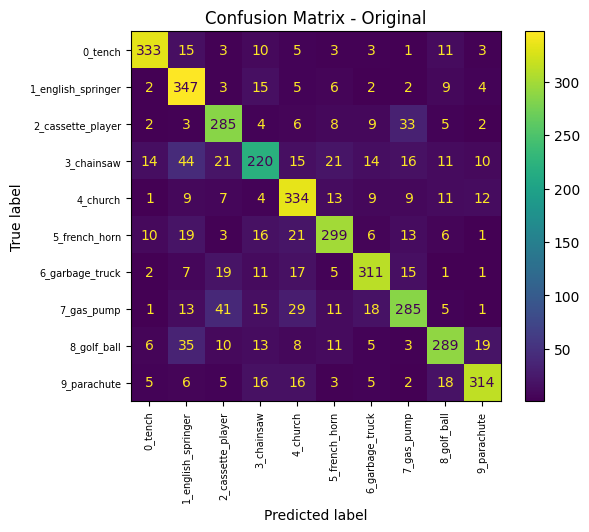

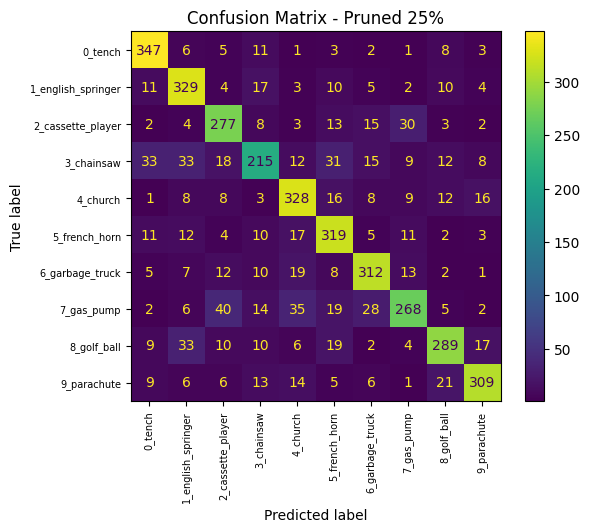

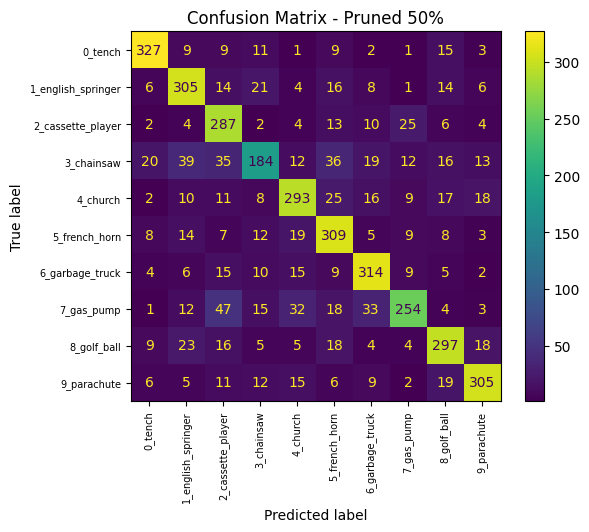

In [320]:

classes = list( range(10) )

classes = [
    "0_tench",
    "1_english_springer",
    "2_cassette_player",
    "3_chainsaw",
    "4_church",
    "5_french_horn",
    "6_garbage_truck",
    "7_gas_pump",
    "8_golf_ball",
    "9_parachute"
]


conf_mats = {
    "Original":
    np.array([[333,  15,   3,  10,   5,   3,   3,   1,  11,   3],
        [  2, 347,   3,  15,   5,   6,   2,   2,   9,   4],
        [  2,   3, 285,   4,   6,   8,   9,  33,   5,   2],
        [ 14,  44,  21, 220,  15,  21,  14,  16,  11,  10],
        [  1,   9,   7,   4, 334,  13,   9,   9,  11,  12],
        [ 10,  19,   3,  16,  21, 299,   6,  13,   6,   1],
        [  2,   7,  19,  11,  17,   5, 311,  15,   1,   1],
        [  1,  13,  41,  15,  29,  11,  18, 285,   5,   1],
        [  6,  35,  10,  13,   8,  11,   5,   3, 289,  19],
        [  5,   6,   5,  16,  16,   3,   5,   2,  18, 314]]
    ),

    "Pruned 25%":
    np.array(
        [[347,   6,   5,  11,   1,   3,   2,   1,   8,   3],
        [ 11, 329,   4,  17,   3,  10,   5,   2,  10,   4],
        [  2,   4, 277,   8,   3,  13,  15,  30,   3,   2],
        [ 33,  33,  18, 215,  12,  31,  15,   9,  12,   8],
        [  1,   8,   8,   3, 328,  16,   8,   9,  12,  16],
        [ 11,  12,   4,  10,  17, 319,   5,  11,   2,   3],
        [  5,   7,  12,  10,  19,   8, 312,  13,   2,   1],
        [  2,   6,  40,  14,  35,  19,  28, 268,   5,   2],
        [  9,  33,  10,  10,   6,  19,   2,   4, 289,  17],
        [  9,   6,   6,  13,  14,   5,   6,   1,  21, 309]]  
    ),
    

    
    "Pruned 50%":
    np.array(
        [[327,   9,   9,  11,   1,   9,   2,   1,  15,   3],
        [  6, 305,  14,  21,   4,  16,   8,   1,  14,   6],
        [  2,   4, 287,   2,   4,  13,  10,  25,   6,   4],
        [ 20,  39,  35, 184,  12,  36,  19,  12,  16,  13],
        [  2,  10,  11,   8, 293,  25,  16,   9,  17,  18],
        [  8,  14,   7,  12,  19, 309,   5,   9,   8,   3],
        [  4,   6,  15,  10,  15,   9, 314,   9,   5,   2],
        [  1,  12,  47,  15,  32,  18,  33, 254,   4,   3],
        [  9,  23,  16,   5,   5,  18,   4,   4, 297,  18],
        [  6,   5,  11,  12,  15,   6,   9,   2,  19, 305]]
    )
    
}

for k, cm in conf_mats.items():
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=classes)
    
    size = 7
    disp.plot()
    plt.xticks(rotation=90, size=size)
    plt.yticks(size=size)
    plt.title(f"Confusion Matrix - {k}")
    # plt.ylim(0,1000)
    plt.savefig(f"/home/exdata/istinye/paper_figs/{k}.png", bbox_inches = 'tight')
    plt.show()

## Loss

In [321]:
import json
from pylab import *
import numpy as np

def load_scalars(json_file):
    data = []
    with open(json_file, 'r') as f:
        for l in f:
            data.append(json.loads(l))

    data_dict = {
        'base_lr': [],
        'lr': [],
        'train_loss': [],
        # 'val_loss': [],
        'epoch': [],
        'top1': [],
        'top5': []
        
    }
    
    current_train_record = data[0]
    current_val_record = None
    
    for i, record in enumerate(data):
        if current_train_record is None:
            current_train_record = data[i]
        if "accuracy/top1" in record:
            current_val_record = record
            data_dict['base_lr'].append(current_train_record['base_lr'])
            data_dict['lr'].append(current_train_record['lr'])
            data_dict['train_loss'].append(current_train_record['loss'])
            # data_dict['val_loss'].append(current_train_record[])
            data_dict['epoch'].append(current_train_record['epoch'])
            data_dict['top1'].append(current_val_record["accuracy/top1"])
            data_dict['top5'].append(current_val_record["accuracy/top5"])

            current_train_record = None
        
        
        
    return data_dict

### Original Model Vs Pruned Model

In [326]:
original_scalars = "/home/exdata/istinye/swin_t_training/swin_t_tiny_IN320_JAN_27/swin_t_tiny_IN320_JAN_27/swin_t_tiny_IN320_JAN_27/20240127_114522/vis_data/20240127_114522.json"
o_data = load_scalars(original_scalars)
[len(o_data[k]) for k,v in o_data.items()]

[50, 50, 50, 50, 50, 50]

In [327]:
pruned_25_scalars = "/home/exdata/istinye/swin_t_training/pruned_swin_t_tiny_IN320_JAN_27/swin_t_tiny_IN320_JAN_27/pruned_swin_t_tiny_IN320_JAN_27/20240127_172226/vis_data/scalars.json"
p_25_data = load_scalars(pruned_25_scalars)
[len(p_25_data[k]) for k,v in p_25_data.items()]

[50, 50, 50, 50, 50, 50]

In [328]:
pruned_50_scalars = "/home/exdata/istinye/swin_t_training/pruned_50_swin_t_tiny_IN320_JAN_27/pruned_50_swin_t_tiny_IN320_JAN_27/pruned_50_swin_t_tiny_IN320_JAN_27/20240127_184329/vis_data/scalars.json"
p_50_data = load_scalars(pruned_50_scalars)
[len(p_50_data[k]) for k,v in p_50_data.items()]

[50, 50, 50, 50, 50, 50]

In [621]:
argmax(o_data['top1']), argmax(p_25_data['top1']), argmax(p_50_data['top1']),

(48, 48, 44)

In [628]:
o_epoch = 48
p_25_epoch = 48
p_50_epoch = 44

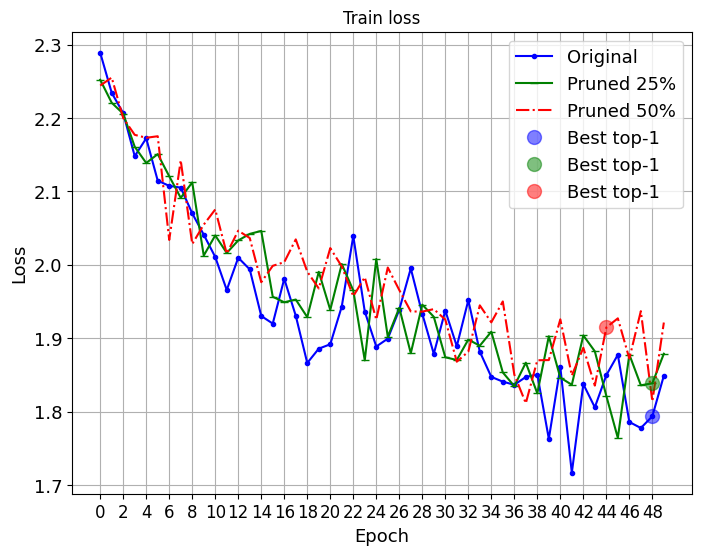

In [629]:
figure(figsize=(8, 6))

limit = np.min((len(o_data['train_loss']), len(p_25_data['train_loss']), len(p_50_data['train_loss'])))
plot(o_data['train_loss'][:limit], '.-b')
plot(p_25_data['train_loss'][:limit], '-_g')
plot(p_50_data['train_loss'][:limit], '-.r')

plot(o_epoch, o_data['train_loss'][o_epoch], 'ob', ms=10, alpha=.5)
plot(p_25_epoch, p_25_data['train_loss'][p_25_epoch], 'og', ms=10, alpha=.5)
plot(p_50_epoch, p_50_data['train_loss'][p_50_epoch], 'or', ms=10, alpha=.5)

legend(["Original", "Pruned 25%", "Pruned 50%", "Best top-1", "Best top-1", "Best top-1"], fontsize=13)
grid()

title('Train loss')


xts = list(range(limit))[::2]
xticks(xts)

ylabel("Loss", size=13)
xlabel("Epoch", size=13)

gca().tick_params(axis='x', which='major', labelsize=12)
gca().tick_params(axis='y', which='major', labelsize=13)


savefig("/home/exdata/istinye/paper_figs/train_loss.png", bbox_inches = 'tight')

show()

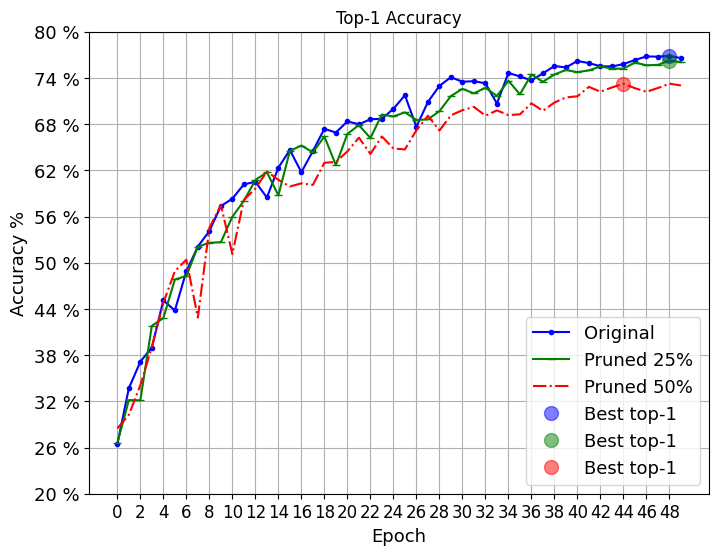

In [630]:
figure(figsize=(8, 6))

key = 'top1'

limit = np.min((len(o_data[key]), len(p_data[key])))
plot(o_data[key][:limit], '.-b')
plot(p_25_data[key][:limit], '-_g')
plot(p_50_data[key][:limit], '-.r')

plot(o_epoch, o_data[key][o_epoch], 'ob', ms=10, alpha=.5)
plot(p_25_epoch, p_25_data[key][p_25_epoch], 'og', ms=10, alpha=.5)
plot(p_50_epoch, p_50_data[key][p_50_epoch], 'or', ms=10, alpha=.5)

legend(["Original", "Pruned 25%", "Pruned 50%", "Best top-1", "Best top-1", "Best top-1"], fontsize=13)


grid()
title('Top-1 Accuracy')

xts = list(range(limit))[::2]
xticks(xts)

yti = np.linspace(20, 80, int((70 - 20)/5) + 1).astype(int)
yt = [str(i) + " %" for i in yti]
yticks(yti, yt)

ylabel("Accuracy %", size=13)
xlabel("Epoch", size=13)

gca().tick_params(axis='x', which='major', labelsize=12)
gca().tick_params(axis='y', which='major', labelsize=13)

savefig("/home/exdata/istinye/paper_figs/top_1.png", bbox_inches = 'tight')

show()

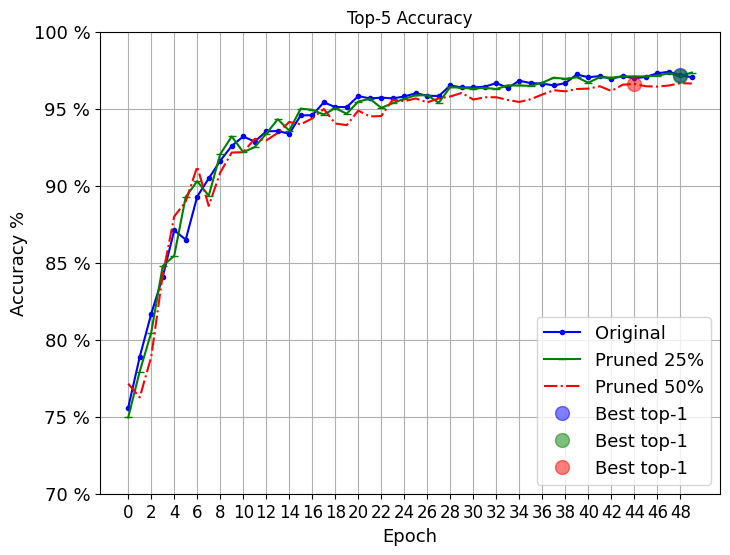

In [631]:
figure(figsize=(8, 6))

key = 'top5'

limit = np.min((len(o_data[key]), len(p_data[key])))
plot(o_data[key][:limit], '.-b')
plot(p_25_data[key][:limit], '-_g')
plot(p_50_data[key][:limit], '-.r')


plot(o_epoch, o_data[key][o_epoch], 'ob', ms=10, alpha=.5)
plot(p_25_epoch, p_25_data[key][p_25_epoch], 'og', ms=10, alpha=.5)
plot(p_50_epoch, p_50_data[key][p_50_epoch], 'or', ms=10, alpha=.5)

legend(["Original", "Pruned 25%", "Pruned 50%", "Best top-1", "Best top-1", "Best top-1"], fontsize=13)


grid()
title('Top-5 Accuracy')

xts = list(range(limit))[::2]
xticks(xts)

yti = np.linspace(70, 100, int((100 - 70)/5) + 1).astype(int)
yt = [str(i) + " %" for i in yti]
yticks(yti, yt)

ylabel("Accuracy %", size=13)
xlabel("Epoch", size=13)


gca().tick_params(axis='x', which='major', labelsize=12)
gca().tick_params(axis='y', which='major', labelsize=13)

savefig('/home/exdata/istinye/paper_figs/top_5.png', bbox_inches = 'tight')

show()


## Vizualize predictions

In [187]:
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path
from glob import glob

In [432]:
original_show_dir = "/home/exdata/istinye/swin_t_training/swin_t_tiny_IN320_JAN_27/swin_t_tiny_IN320_JAN_27/swin_t_tiny_IN320_JAN_27/show_original"
o_imps = glob(original_show_dir + '/*.png')

pruned_25_show_dir = "/home/exdata/istinye/swin_t_training/pruned_swin_t_tiny_IN320_JAN_27/swin_t_tiny_IN320_JAN_27/pruned_swin_t_tiny_IN320_JAN_27/show_original"
p_25_imps = glob(pruned_25_show_dir + '/*.png')

pruned_50_show_dir = "/home/exdata/istinye/swin_t_training/pruned_50_swin_t_tiny_IN320_JAN_27/pruned_50_swin_t_tiny_IN320_JAN_27/pruned_50_swin_t_tiny_IN320_JAN_27/show_pruned"
p_50_imps = glob(pruned_50_show_dir + '/*.png')

In [525]:
all_rand_ixs

[array([2159, 1745, 1931, 1311,  161, 2953, 1029, 2981]),
 array([ 197, 3450, 1198,  924, 3772, 3498, 3326,  518]),
 array([2005,  300, 3885, 2631, 3762,  744,  891, 2637])]

In [635]:
o_imps.index("/home/exdata/istinye/swin_t_training/swin_t_tiny_IN320_JAN_27/swin_t_tiny_IN320_JAN_27/swin_t_tiny_IN320_JAN_27/show_original/n03394916_51440.JPEG_0.png")

649

In [637]:
o_imps.index("/home/exdata/istinye/swin_t_training/swin_t_tiny_IN320_JAN_27/swin_t_tiny_IN320_JAN_27/swin_t_tiny_IN320_JAN_27/show_original/n03394916_39220.JPEG_0.png")

2093

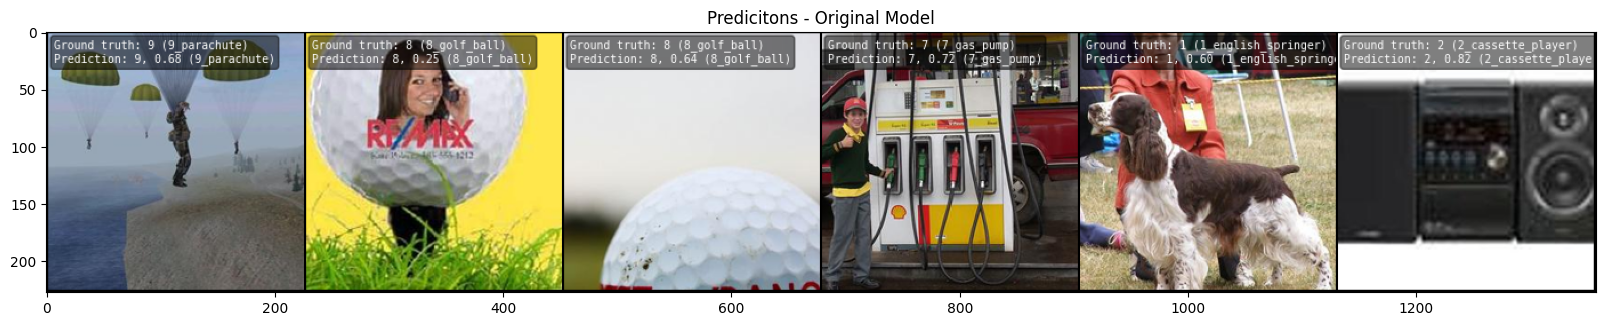

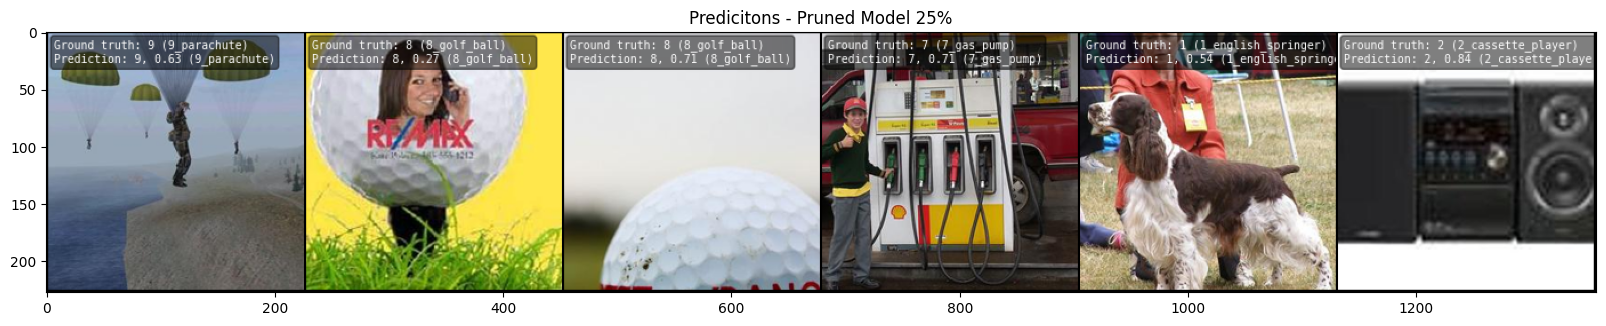

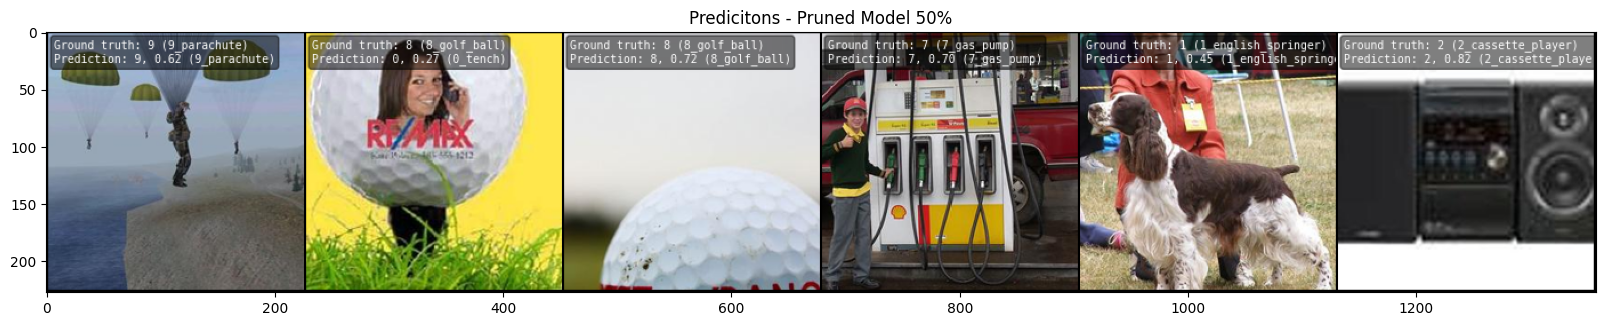

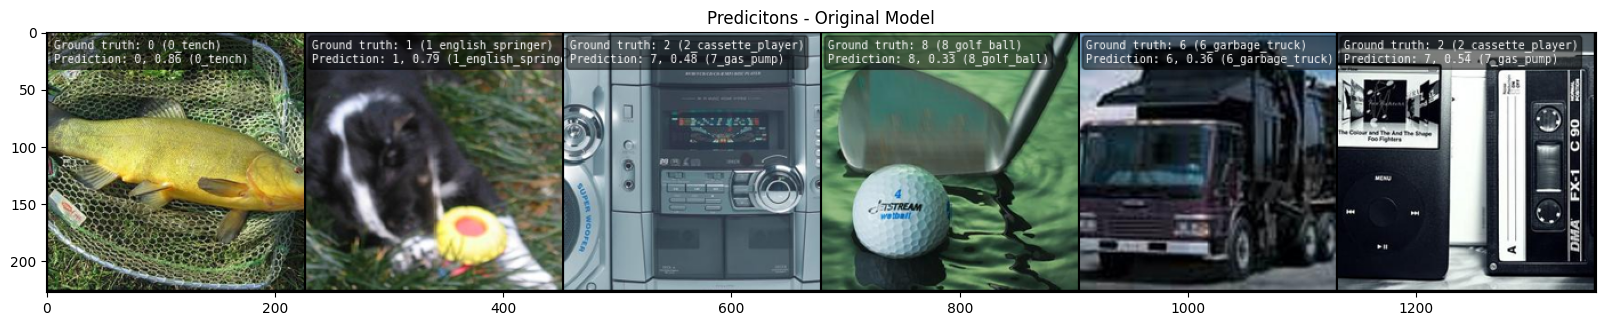

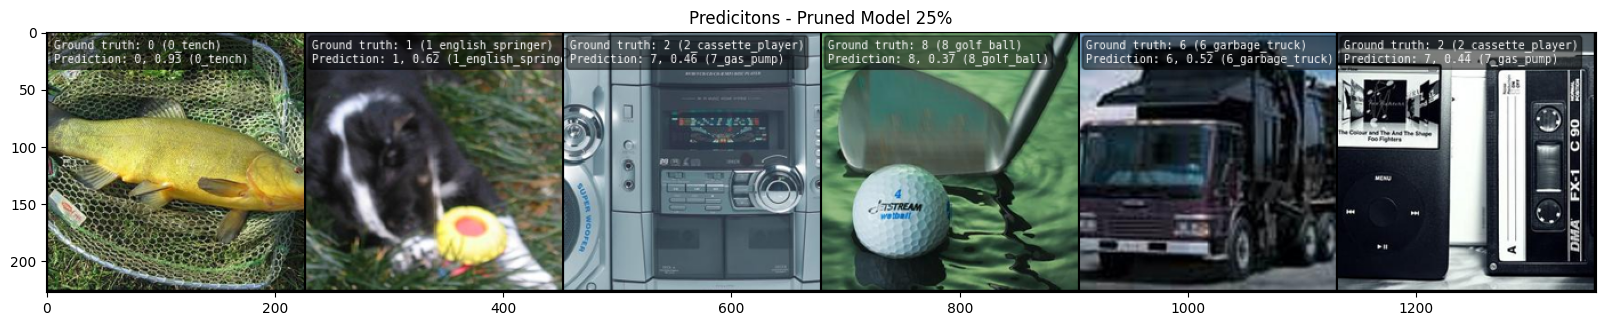

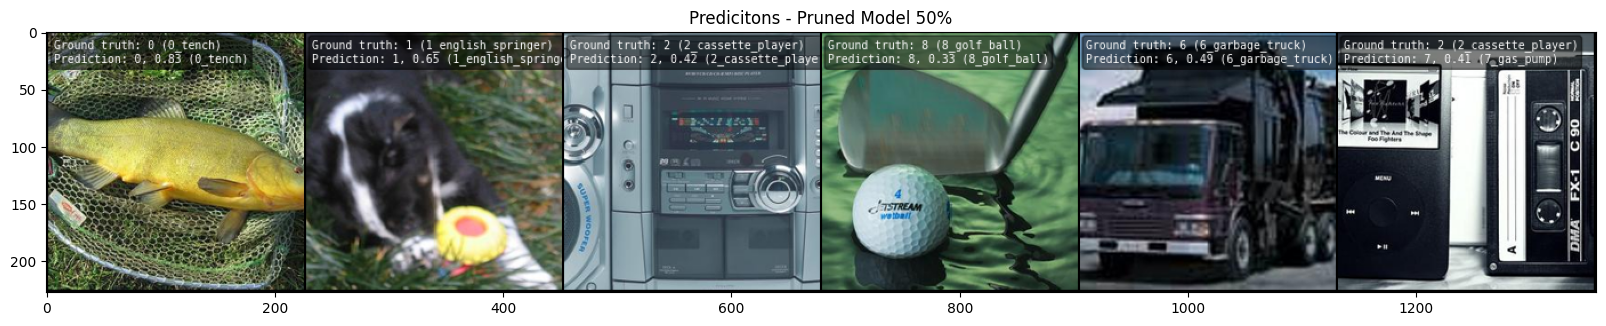

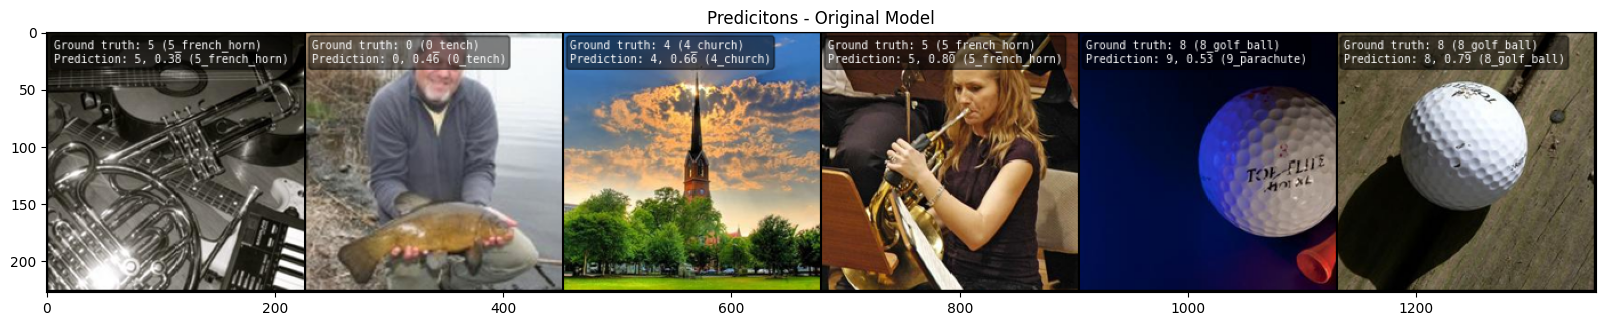

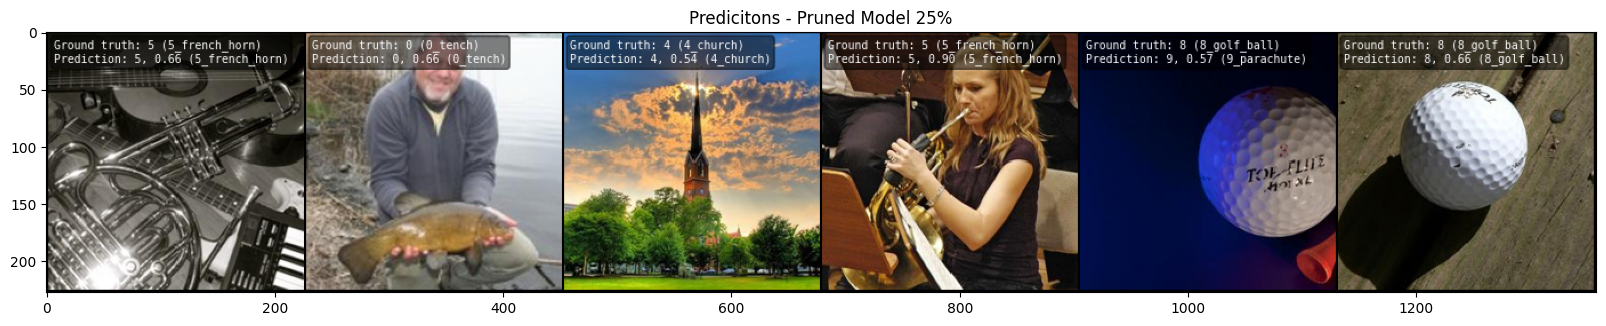

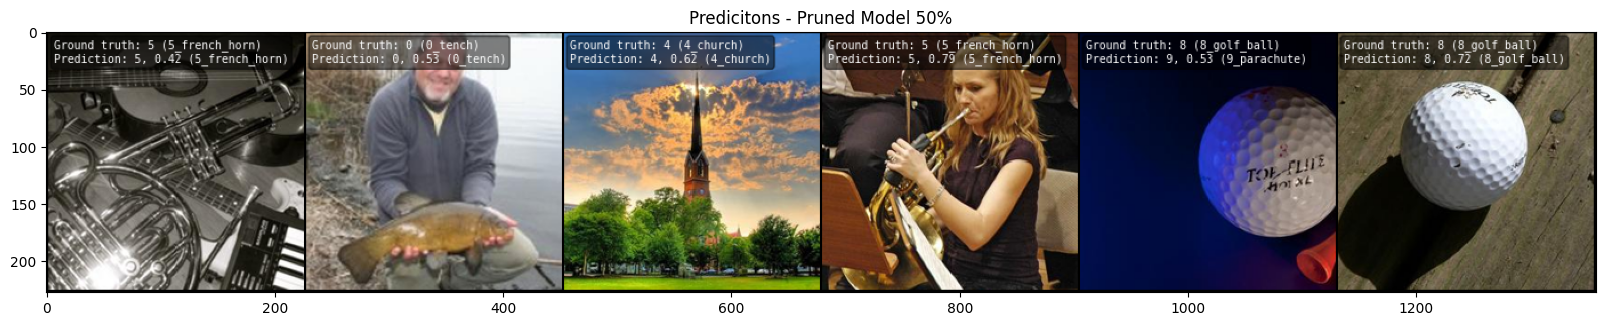

In [641]:



# all_rand_ixs = [
#     np.random.choice( range(len(o_imps)) , 8),
#     np.random.choice( range(len(o_imps)) , 8),
#     np.random.choice( range(len(o_imps)) , 8)
# ]

all_rand_ixs = [
    array([1931, 1668, 2629, 1735, 2034, 1251]),
    array([1439,  505,  187, 3679, 1420, 3326]),
    array([578, 3008, 1852, 2093, 2612, 1248])
    # 649
]


for ix, rand_ixs in enumerate(all_rand_ixs):

    o_collage = []
    p_25_collage = []
    p_50_collage = []
    
    for ix in rand_ixs:
        im = read_image(o_imps[ix])
        o_collage.append(im)
    
    for ix in rand_ixs:
        im = read_image(p_25_imps[ix])
        p_25_collage.append(im)
        
    for ix in rand_ixs:
        im = read_image(p_50_imps[ix])
        p_50_collage.append(im)
    
    fsize = (20,10)
    
    figure(figsize=fsize)
    title("Predicitons - Original Model")
    o_grid = make_grid(o_collage)
    o_grid = o_grid.permute(1,2,0)
    o_grid = np.array(o_grid)[:, :, ::-1]
    imshow(o_grid)
    # xlim(0, 1050)
    # ylim(220, 0)
    savefig(f"/home/exdata/istinye/paper_figs/pred_out_original_{ix}.png", bbox_inches = 'tight')
    show()
    
    figure(figsize=fsize)
    title("Predicitons - Pruned Model 25%")
    p_grid = make_grid(p_25_collage)
    p_grid = p_grid.permute(1,2,0)
    p_grid = np.array(p_grid)[:, :, ::-1]
    imshow(p_grid)
    # xlim(0, 1050)
    # ylim(220, 0)
    savefig(f"/home/exdata/istinye/paper_figs/pred_out_pruned_25_{ix}.png",  bbox_inches = 'tight')
    show()


    figure(figsize=fsize)
    title("Predicitons - Pruned Model 50%")
    p_grid = make_grid(p_50_collage)
    p_grid = p_grid.permute(1,2,0)
    p_grid = np.array(p_grid)[:, :, ::-1]
    imshow(p_grid)
    # xlim(0, 1050)
    # ylim(220, 0)
    savefig(f"/home/exdata/istinye/paper_figs/pred_out_pruned_50_{ix}.png",  bbox_inches = 'tight')
    show()

In [644]:
concat_list = [
"/home/exdata/istinye/paper_figs/pred_out_original_1248.png",
"/home/exdata/istinye/paper_figs/pred_out_pruned_25_1248.png",
"/home/exdata/istinye/paper_figs/pred_out_pruned_50_1248.png",
"/home/exdata/istinye/paper_figs/pred_out_original_1251.png",
"/home/exdata/istinye/paper_figs/pred_out_pruned_25_1251.png",
"/home/exdata/istinye/paper_figs/pred_out_pruned_50_1251.png",
"/home/exdata/istinye/paper_figs/pred_out_original_3326.png",
"/home/exdata/istinye/paper_figs/pred_out_pruned_25_3326.png",
"/home/exdata/istinye/paper_figs/pred_out_pruned_50_3326.png",
]

In [645]:
imgs = []
for imp in concat_list:
    img = cv2.imread(imp)
    imgs.append(img)

collage = np.concatenate(imgs, axis=0)
cv2.imwrite("/home/exdata/istinye/paper_figs/collage_samples.png", collage)

True